## Assignment 1 - Modelling and Simulation Basics

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib import rcParams

rcParams.update({'text.usetex': True,
                 'font.family': 'serif',
                 'font.serif': ['Computer Modern'],
                 'axes.unicode_minus': False,
                 'font.size': 12}) 

#### Problem 2 - Integrator

In [38]:
params = {
    "m": 1.0,
    "k": 1.0,
    "d": 0.5
}

In [ ]:
def y_dot(t, y, params):
    x1, x2 = y
    m = params["m"]
    k = params["k"]
    d = params["d"]
    
    dx1dt = x2
    dx2dt = -(k / m) * x1 -(d / m) * x2
    
    return [dx1dt, dx2dt]

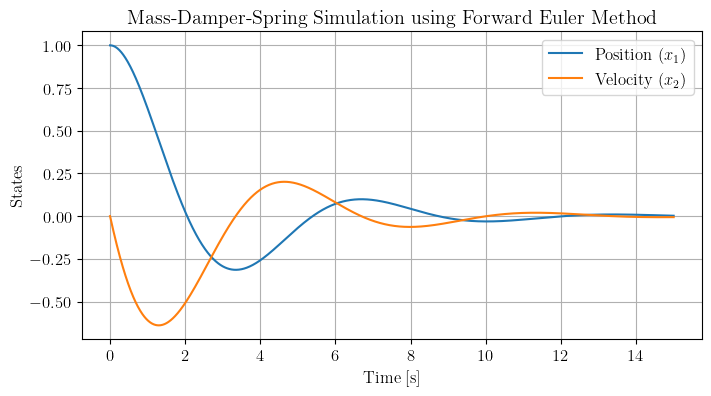

In [20]:
dt = 0.01
t_start = 0.0
t_end = 15.0

t = np.arange(t_start, t_end + dt, dt)

x1 = np.zeros(len(t))
x2 = np.zeros(len(t))

# Initial conditions
x1[0] = 1.0
x2[0] = 0.0

# Forward Euler integration
for k in range (len(t) - 1):
    y = np.array([x1[k], x2[k]])
    dydt = y_dot(t[k], y, params)
    
    x1[k + 1] = x1[k] + dydt[0] * dt
    x2[k + 1] = x2[k] + dydt[1] * dt

plt.figure(figsize=(8, 4))
plt.plot(t, x1, label='Position ($x_1$)')
plt.plot(t, x2, label='Velocity ($x_2$)')
plt.title('Mass-Damper-Spring Simulation using Forward Euler Method')
plt.xlabel('Time $[\mathrm{s}]$')
plt.ylabel('States')
plt.legend()
plt.grid(True)
plt.show()

#### Problem 3 - Analytical Solution and Comparison

In [16]:
def compute_analytical_solution(t, y0, params):
    m = params["m"]
    k = params["k"]
    d = params["d"]
    
    x1 = np.zeros(len(t))
    omega_n = np.sqrt(k / m)
    zeta    = d / (2 * np.sqrt(k * m))
    
    epsilon = 1e-6
    
    if 0 <= zeta < 1:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        x1 = np.exp(-zeta * omega_n * t) * (y0[0] * np.cos(omega_d * t) +
                   ((y0[1] + zeta * omega_n * y0[0]) / omega_d) * np.sin(omega_d * t))
        return x1
    elif 1 - epsilon <= zeta <= 1 + epsilon:
        x1 = (y0[0] + (y0[1] + omega_n * y0[0]) * t) * np.exp(-omega_n * t)
        return x1
    else:
        r1 = -zeta * omega_n + omega_n * np.sqrt(zeta**2 - 1)
        r2 = -zeta * omega_n - omega_n * np.sqrt(zeta**2 - 1)
        
        C1 = (y0[1] - r2 * y0[0]) / (r1 - r2)
        C2 = y0[0] - C1
        
        x1 = C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t)
        return x1

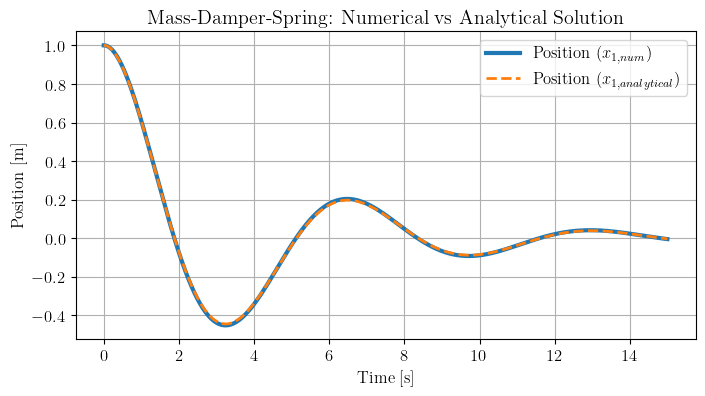

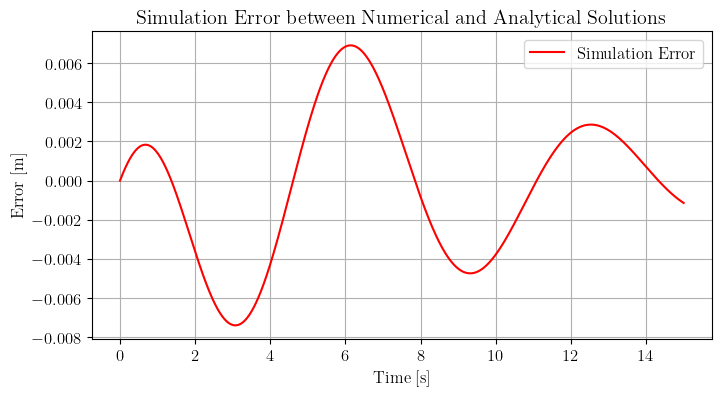

In [39]:
dt = 0.01
t_start = 0.0
t_end = 15.0

t = np.arange(t_start, t_end + dt, dt)

x1_num, x1_a = np.zeros(len(t)), np.zeros(len(t))
x2_num, x2_a = np.zeros(len(t)), np.zeros(len(t))

# Initial conditions
x1_num[0], x1_a[0] = 1.0, 1.0
x2_num[0], x2_a[0] = 0.0, 0.0

# Forward Euler integration
for k in range (len(t) - 1):
    y = np.array([x1_num[k], x2_num[k]])
    dydt = y_dot(t[k], y, params)
    
    x1_num[k + 1] = x1_num[k] + dydt[0] * dt
    x2_num[k + 1] = x2_num[k] + dydt[1] * dt

x1_a = compute_analytical_solution(t, [x1_a[0], x2_a[0]], params)

plt.figure(figsize=(8, 4))
plt.plot(t, x1_num, label='Position ($x_{1,num}$)', linestyle='-', linewidth=3)
plt.plot(t, x1_a, label='Position ($x_{1,analytical}$)', linestyle='--', linewidth=2)
plt.title('Mass-Damper-Spring: Numerical vs Analytical Solution')
plt.xlabel('Time $[\mathrm{s}]$')
plt.ylabel('Position $[\mathrm{m}]$')
plt.legend()
plt.grid(True)
plt.show()

simulation_error = x1_num - x1_a

plt.figure(figsize=(8, 4))
plt.plot(t, simulation_error, label='Simulation Error', color='red')
plt.title('Simulation Error between Numerical and Analytical Solutions')
plt.xlabel('Time $[\mathrm{s}]$')
plt.ylabel('Error $[\mathrm{m}]$')
plt.legend()
plt.grid(True)
plt.show()